In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score
from xgboost import XGBClassifier

In [3]:
# loading data
df_application = pd.read_csv('/content/application_record.csv')
df_credit = pd.read_csv('/content/credit_record.csv')

In [11]:
df = pd.merge(df_application, df_credit, on='ID', how='inner')
# dropping null value
df.dropna(inplace=True)
# checking null value
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [12]:
df.shape

(537667, 20)

In [14]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                  object
dtype: object

In [ ]:
df.drop(['FLAG_MOBIL'], axis=1, inplace=True)
df.drop(['ID'], axis=1, inplace=True)
df['FLAG_WORK_PHONE'] = df['FLAG_WORK_PHONE'].map({1: 'Yes', 0: 'No'})
df['FLAG_PHONE'] = df['FLAG_PHONE'].map({1: 'Yes', 0: 'No'})
df['FLAG_EMAIL'] = df['FLAG_EMAIL'].map({1: 'Yes', 0: 'No'})
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,537667.000000,0.506697,0.787285,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,537667.000000,197117.126677,104138.963465,27000.000000,135000.000000,180000.000000,229500.000000,1575000.000000
DAYS_BIRTH,537667.000000,-15010.958999,3416.418092,-24611.000000,-17594.000000,-14785.000000,-12239.000000,-7489.000000
DAYS_EMPLOYED,537667.000000,-2762.029935,2393.919456,-15713.000000,-3661.000000,-2147.000000,-1050.000000,-17.000000
CNT_FAM_MEMBERS,537667.000000,2.303069,0.936852,1.000000,2.000000,2.000000,3.000000,20.000000
MONTHS_BALANCE,537667.000000,-19.305241,14.037827,-60.000000,-29.000000,-17.000000,-8.000000,0.000000


In [ ]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df_numeric = df[numeric_cols]
correlation_matrix = df_numeric.corr()
correlation_matrix

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE
CNT_CHILDREN,1.000000,-0.014309,0.277567,0.073164,0.904351,-0.000430
AMT_INCOME_TOTAL,-0.014309,1.000000,-0.047838,-0.009500,-0.025477,-0.001829
DAYS_BIRTH,0.277567,-0.047838,1.000000,0.324231,0.237472,0.051247
DAYS_EMPLOYED,0.073164,-0.009500,0.324231,1.000000,0.058954,0.044414
CNT_FAM_MEMBERS,0.904351,-0.025477,0.237472,0.058954,1.000000,-0.008847
MONTHS_BALANCE,-0.000430,-0.001829,0.051247,0.044414,-0.008847,1.000000


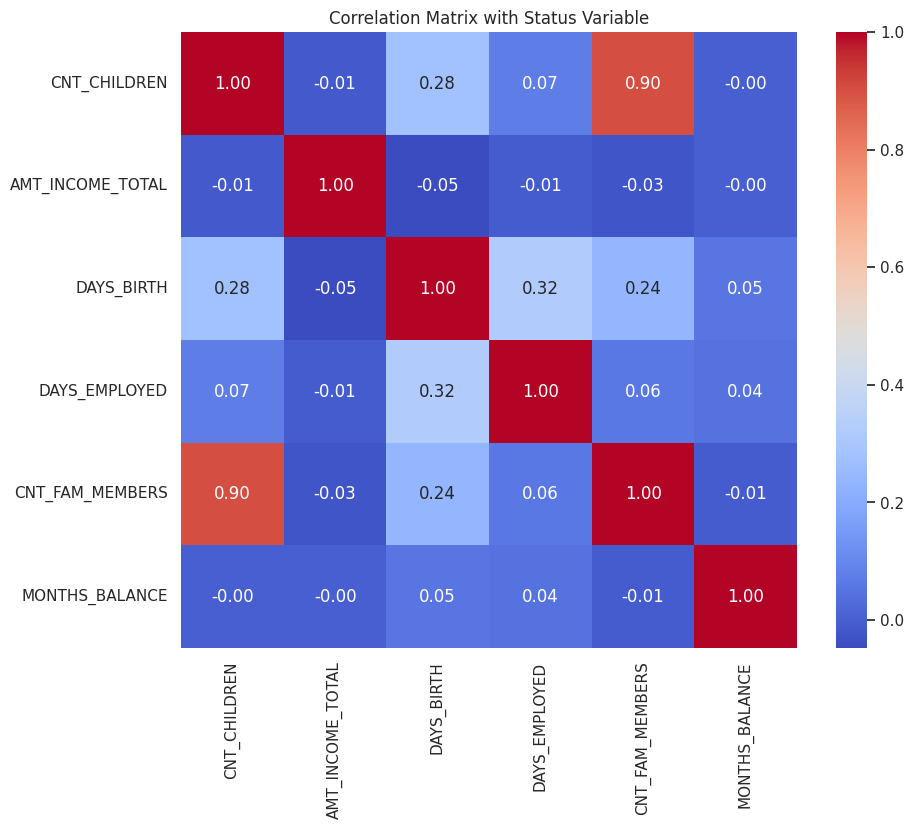

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix with Status Variable')
plt.show()

In [ ]:
df.drop(['CNT_CHILDREN'], axis=1, inplace=True)

<ipython-input-126-43e745791005>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AMT_INCOME_TOTAL'], kde=False)


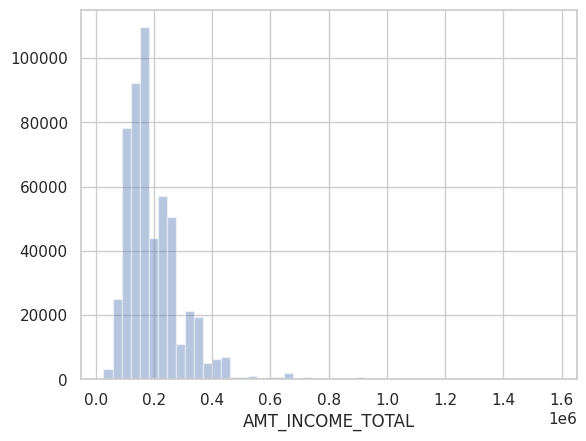

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram without the KDE line
sns.distplot(df['AMT_INCOME_TOTAL'], kde=False)

# Display the plot
plt.show()

In [ ]:
df['AMT_INCOME_TOTAL']= df['AMT_INCOME_TOTAL'].where(df['AMT_INCOME_TOTAL'] < 0.6e+06) # remove outliers

<ipython-input-128-43e745791005>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AMT_INCOME_TOTAL'], kde=False)


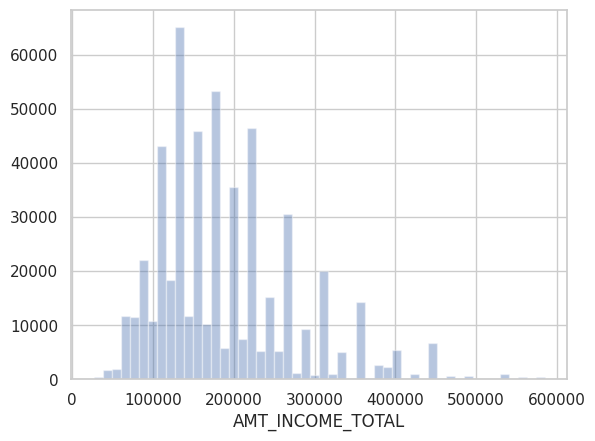

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram without the KDE line
sns.distplot(df['AMT_INCOME_TOTAL'], kde=False)

# Display the plot
plt.show()

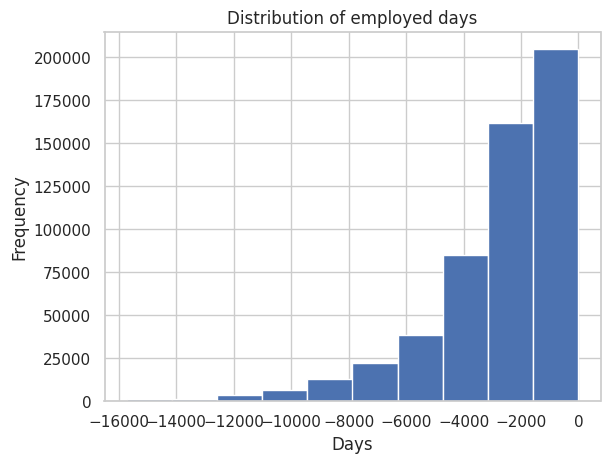

In [ ]:
plt.hist(df['DAYS_EMPLOYED'])
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Distribution of employed days')
plt.show()

In [ ]:
df['DAYS_EMPLOYED'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + df['DAYS_EMPLOYED'].apply(pd.offsets.Day)

In [ ]:
df['DAYS_EMPLOYED'].unique()

array([Timestamp('2020-11-23 00:00:00'), Timestamp('2015-08-25 00:00:00'),
       Timestamp('2021-11-23 00:00:00'), ...,
       Timestamp('2020-03-08 00:00:00'), Timestamp('2001-08-28 00:00:00'),
       Timestamp('2022-05-05 00:00:00')], dtype=object)

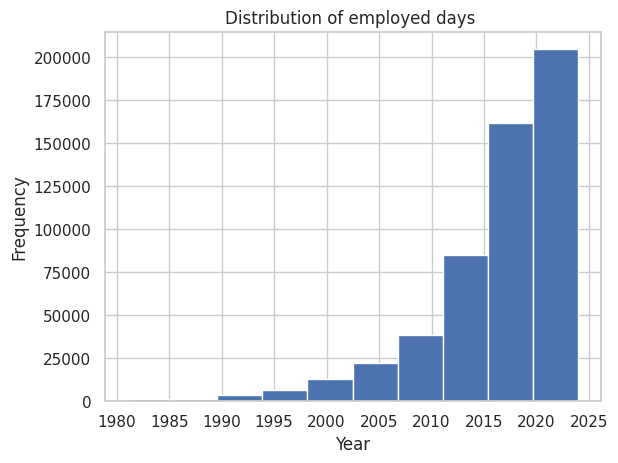

In [ ]:
plt.hist(df['DAYS_EMPLOYED'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of employed days ')
plt.show()

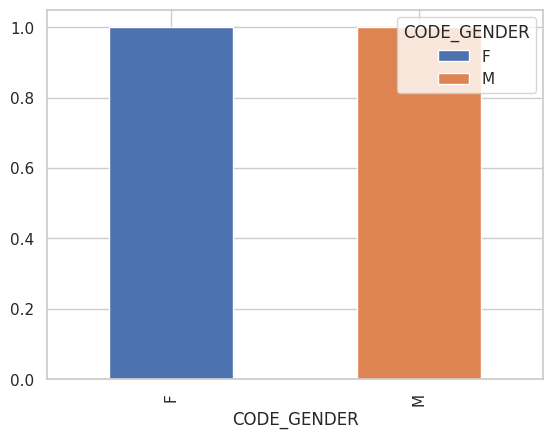

In [ ]:
house =pd.crosstab(df['CODE_GENDER'],df['CODE_GENDER'])
house.div(house.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

<ipython-input-134-e38cd40ac657>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DAYS_EMPLOYED'], kde=False)


TypeError: float() argument must be a string or a real number, not 'Timestamp'

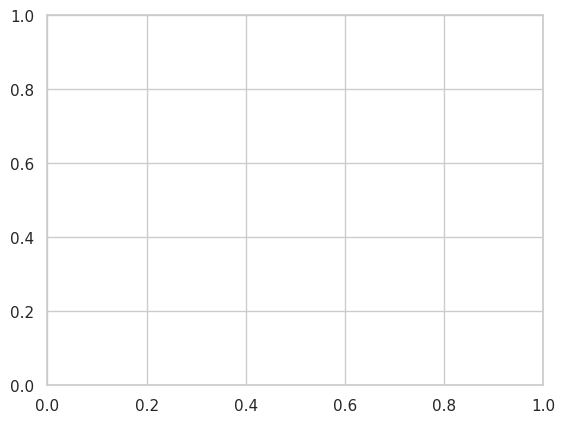

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram without the KDE line
sns.distplot(df['DAYS_EMPLOYED'], kde=False)

# Display the plot
plt.show()

In [ ]:
df['DAYS_EMPLOYED']= df['DAYS_EMPLOYED'].where(df['DAYS_EMPLOYED'] > -11000) # remove outliers

In [ ]:
# Plotting the histogram without the KDE line
sns.distplot(df['DAYS_EMPLOYED'], kde=False)

# Display the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame loading
# df = pd.read_csv('your_file.csv')

# Vertical boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(y=df["CNT_FAM_MEMBERS"], color='lightgreen')  # Vertical boxplot with a specific color

plt.title('Distribution of Family Members Count')  # Adding a title
plt.ylabel('Count of Family Members')  # Label for the y-axis

plt.show()

In [ ]:
# Plotting the histogram without the KDE line
sns.boxplot( x=df["CNT_FAM_MEMBERS"])

In [ ]:
df['CNT_FAM_MEMBERS']= df['CNT_FAM_MEMBERS'].where(df['CNT_FAM_MEMBERS'] < 5) # remove outliers

In [ ]:
# Plotting the histogram without the KDE line
sns.boxplot( x=df["CNT_FAM_MEMBERS"])

In [ ]:
# Plotting the histogram without the KDE line
sns.distplot(df['MONTHS_BALANCE'], kde=False)

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=df["STATUS"].value_counts().values,
            y=df["STATUS"].value_counts().index,
            palette='pastel')
plt.show()

In [ ]:
df['STATUS'].replace("C" , "Good_Debt" , inplace = True)
df['STATUS'].replace("X" , "Good_Debt" , inplace = True)
df['STATUS'].replace("0" , "Good_Debt" , inplace = True)
df['STATUS'].replace("1" , "Good_Debt" , inplace = True)
df['STATUS'].replace("2" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("3" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("4" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("5" , "Bad_Debt" , inplace = True)

In [ ]:
df["STATUS"].value_counts()

In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts of each unique value in the 'STATUS' column
status_counts = df['STATUS'].value_counts()

# Define custom colors for the pie chart
colors = ['pink', 'white']  # Adjust the number of colors based on the number of unique statuses

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of STATUS')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts of each unique value in the 'STATUS' column
status_counts = df['STATUS'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of STATUS')
plt.show()

In [ ]:
reference_date = datetime.strptime("2024-01-01", "%Y-%m-%d")
df['DAYS_EMPLOYED'] = pd.to_datetime(reference_date) + pd.to_timedelta(df['DAYS_EMPLOYED'], unit='D')

In [ ]:
sns.distplot(df['DAYS_EMPLOYED'])
plt.show()

In [ ]:
plt.hist(df['DAYS_EMPLOYED'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Employed Years')
plt.show()

In [ ]:
sns.distplot(df['DAYS_EMPLOYED'])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of seaborn
sns.set(style="whitegrid")  # You can choose other styles like 'darkgrid', 'white', 'dark', etc.

# Creating the histogram
sns.histplot(data=df, x='DAYS_EMPLOYED', kde=False, color="blue", binwidth=1)  # binwidth controls the width of each bin

# Adding labels and title
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.title('Distribution of Employed Years')

# Show the plot
plt.show()

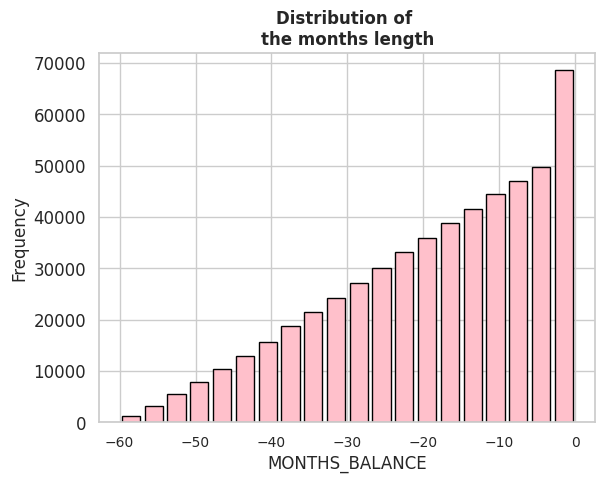

In [ ]:
ax = df["MONTHS_BALANCE"].hist( # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=20, # Number of bins
                        edgecolor='black', # Color of the border
                        color='pink', # Color of the bins
                        rwidth=0.8 # Space between bins
                       )

# Add a bold title ('\n' allow us to jump rows)
ax.set_title('Distribution of \nthe months length',
             weight='bold')

# Add label names
ax.set_xlabel('MONTHS_BALANCE')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
df["MONTHS_BALANCE"]=df["MONTHS_BALANCE"]*-1

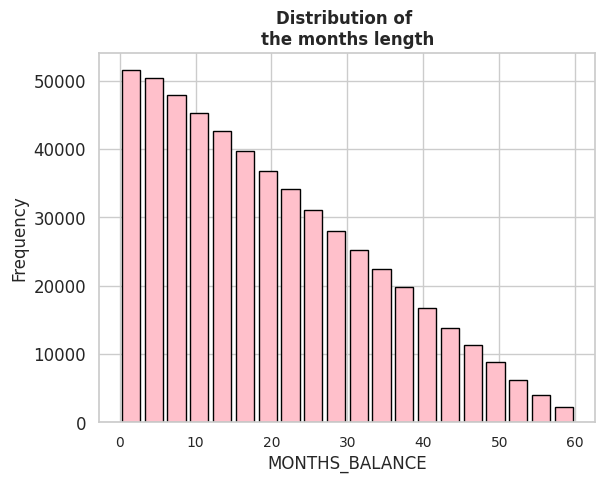

In [ ]:
ax = df["MONTHS_BALANCE"].hist( # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=20, # Number of bins
                        edgecolor='black', # Color of the border
                        color='pink', # Color of the bins
                        rwidth=0.8 # Space between bins
                       )

# Add a bold title ('\n' allow us to jump rows)
ax.set_title('Distribution of \nthe months length',
             weight='bold')

# Add label names
ax.set_xlabel('MONTHS_BALANCE')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# checking null value
df.isnull().sum()

CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
AMT_INCOME_TOTAL       5009
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED          5893
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE           0
CNT_FAM_MEMBERS        7938
MONTHS_BALANCE            0
STATUS                    0
dtype: int64

In [ ]:
# Remove all rows with any missing values
df = df.dropna()

# Check how many rows are left after removing missing values
print("Number of rows after removing missing values:", df.shape[0])

Number of rows after removing missing values: 518890


In [ ]:
import pandas as pd
# Selecting categorical columns except the target column 'STATUS'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('STATUS')  # Remove the target feature from the list of columns to encode

# Applying one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

earliest_date = df_encoded['DAYS_EMPLOYED'].min()
df_encoded['DAYS_EMPLOYED'] = (df_encoded['DAYS_EMPLOYED'] - earliest_date).dt.days

In [ ]:
df_encoded.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
31,112500.0,1965-03-17,9775,2.0,0,Good_Debt,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
32,112500.0,1965-03-17,9775,2.0,1,Good_Debt,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
33,112500.0,1965-03-17,9775,2.0,2,Good_Debt,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
34,112500.0,1965-03-17,9775,2.0,3,Good_Debt,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
35,112500.0,1965-03-17,9775,2.0,4,Good_Debt,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

np.random.seed(5741)

X = df_encoded.drop(['STATUS','DAYS_BIRTH'], axis=1)  # Extracting features
y = df_encoded['STATUS']  # Extracting target

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Resampled training set class distribution: {y_resampled.value_counts()}")

# Verify the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Resampled training set class distribution: Good_Debt    516973
Bad_Debt     516973
Name: STATUS, dtype: int64
Training set shape: (827156, 44)
Testing set shape: (206790, 44)


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print('Logistic Model  Train Accuracy : ',lr_model.score(X_train, y_train)*100, '%')
print('Logistic Model Test Accuracy : ', lr_model.score(X_test, y_test)*100, '%')

lr_prediction = lr_model.predict(X_test)
print('\nClassification report:')
print(classification_report(y_test, lr_prediction))

Logistic Model  Train Accuracy :  52.43170574837153 %
Logistic Model Test Accuracy :  52.61037767783742 %

Classification report:
              precision    recall  f1-score   support

    Bad_Debt       0.52      0.71      0.60    103449
   Good_Debt       0.54      0.34      0.42    103341

    accuracy                           0.53    206790
   macro avg       0.53      0.53      0.51    206790
weighted avg       0.53      0.53      0.51    206790



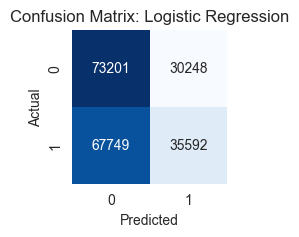

In [ ]:
conf_matrix = confusion_matrix(y_test, lr_prediction)

# Plot confusion matrix
plt.figure(figsize=(2, 2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

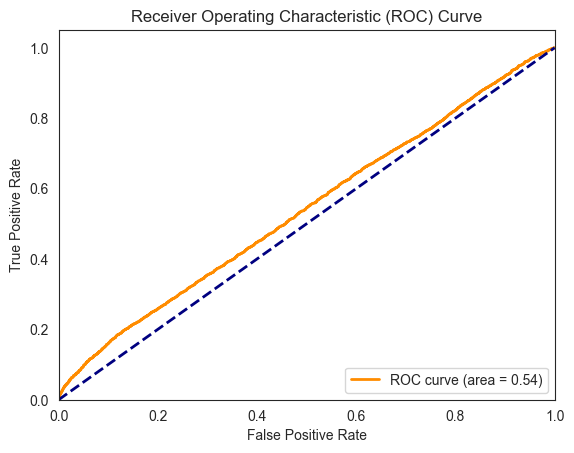

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1], pos_label='Good_Debt')

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)
print("RandomForest Train Accuracy = ",rf_model.score(X_train, y_train)*100, '%')
print('RandomForest Test Accuracy : ', rf_model.score(X_test, y_test)*100, '%')

rf_prediction = rf_model.predict(X_test)
print('\nClassification report:')
print(classification_report(y_test, rf_prediction))

RandomForest Train Accuracy =  99.44266861390113 %
RandomForest Test Accuracy :  99.3877847091252 %

Classification report:
              precision    recall  f1-score   support

    Bad_Debt       0.99      1.00      0.99    103449
   Good_Debt       1.00      0.99      0.99    103341

    accuracy                           0.99    206790
   macro avg       0.99      0.99      0.99    206790
weighted avg       0.99      0.99      0.99    206790



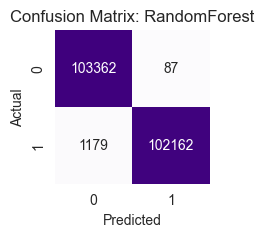

In [ ]:
conf_matrix = confusion_matrix(y_test, rf_prediction)

# Plot confusion matrix
plt.figure(figsize=(2, 2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix: RandomForest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

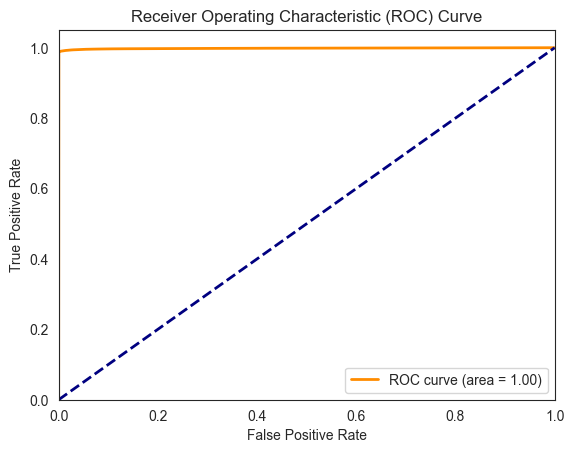

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label='Good_Debt')

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
dtree_model = DecisionTreeClassifier(random_state = 42)
dtree_model.fit(X_train, y_train)
print('Decision Tree Model  Train Accuracy : ',dtree_model.score(X_train, y_train)*100, '%')
print('Decision Tree Model Test Accuracy : ', dtree_model.score(X_test, y_test)*100, '%')

dtree_prediction = dtree_model.predict(X_test)
print('\nClassification report:')
print(classification_report(y_test, dtree_prediction))

Decision Tree Model  Train Accuracy :  99.44266861390113 %
Decision Tree Model Test Accuracy :  99.37714589680353 %

Classification report:
              precision    recall  f1-score   support

    Bad_Debt       0.99      1.00      0.99    103449
   Good_Debt       1.00      0.99      0.99    103341

    accuracy                           0.99    206790
   macro avg       0.99      0.99      0.99    206790
weighted avg       0.99      0.99      0.99    206790



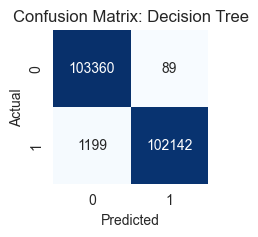

In [ ]:
conf_matrix = confusion_matrix(y_test, dtree_prediction)

# Plot confusion matrix
plt.figure(figsize=(2, 2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

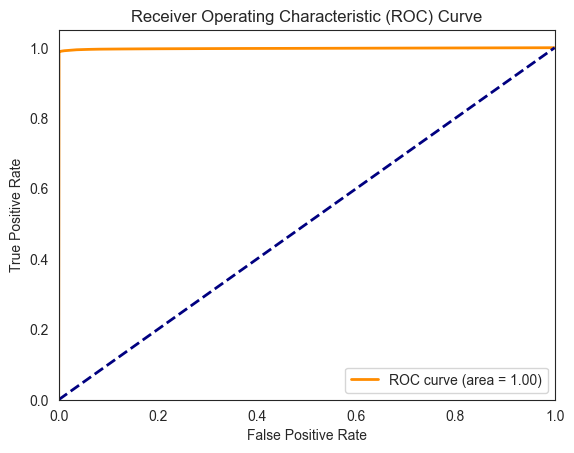

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dtree_model.predict_proba(X_test)[:, 1], pos_label='Good_Debt')

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)
print('XGB Model  Train Accuracy : ',xgb_model.score(X_train, y_train_encoded)*100, '%')
print('XGB Model Test Accuracy : ', xgb_model.score(X_test, y_test_encoded)*100, '%')

xgb_prediction = xgb_model.predict(X_test)
print('\nClassification report:')
print(classification_report(y_test_encoded, xgb_prediction))

XGB Model  Train Accuracy :  98.6962556035379 %
XGB Model Test Accuracy :  98.66289472411626 %

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    103449
           1       0.99      0.98      0.99    103341

    accuracy                           0.99    206790
   macro avg       0.99      0.99      0.99    206790
weighted avg       0.99      0.99      0.99    206790



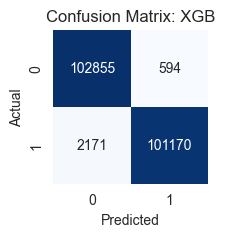

In [ ]:
conf_matrix = confusion_matrix(y_test_encoded, xgb_prediction)

# Plot confusion matrix
plt.figure(figsize=(2, 2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

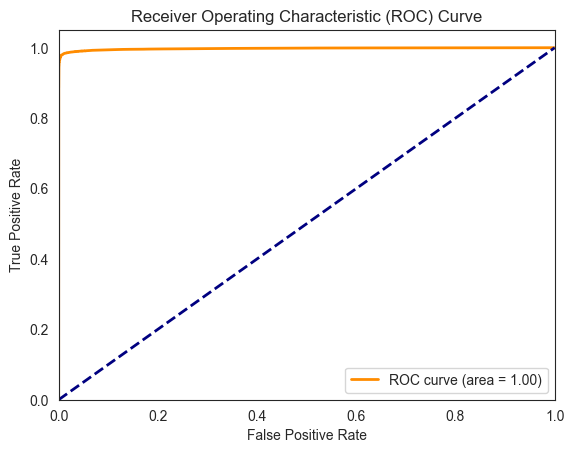

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, xgb_model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()